 Predictive Modelling with Linear Regression

We will use the NBA player statistics data set to see which features can be used to predict season performance. 

- GP     Games Played
- MIN    Minutes Played
- PTS    Points
- FGM    Field Goals Made
- FGA    Field Goals Attempted
- FG%    Field Goal Percentage
- 3PM    3 Point Field Goals Made
- 3PA    3 Point Field Goals Attempted
- 3P%    3 Point Field Goals Percentage
- FTM    Free Throws Made
- FTA    Free Throws Attempted
- FT%    Free Throw Percentage
- OREB   Offensive Rebounds
- DREB   Defensive Rebounds
- REB    Rebounds
- AST    Assists
- STL    Steals
- BLK    Blocks
- TOV    Turnovers
- EFF    Efficiency



In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df=pd.read_csv(r'R:\Datascience-U of T\Course-1\PY2\Assignment-3/players_stats.csv')
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [29]:
df.isnull().sum()

Name              0
Games Played      0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
EFF               0
AST/TOV           0
STL/TOV           0
Age              68
Birth_Place      68
Birthdate        68
Collage         140
Experience       68
Height           68
Pos              68
Team             68
Weight           68
BMI              68
dtype: int64

In [30]:
cleaned=df.dropna()
cleaned.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [31]:
print(cleaned['Pos'].nunique())

5


In [32]:
position_dummies=pd.get_dummies(cleaned['Pos'])
position_dummies.rename(columns={'C':'C_Pos'}, inplace=True)
position_dummies.head()

,C_Pos,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [33]:
cleaned=pd.concat([cleaned,position_dummies],axis='columns')
cleaned.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Height,Pos,Team,Weight,BMI,C_Pos,PF,PG,SF,SG
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,185.0,PG,PHO,81.45,23.798393,0,0,1,0,0
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,180.0,PG,CHI,72.45,22.361111,0,0,1,0,0
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,202.5,PF,ORL,99.00,24.142661,0,1,0,0,0
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,205.0,PF,ATL,106.65,25.377751,0,1,0,0,0
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,205.0,C,ATL,110.25,26.234384,1,0,0,0,0


In [35]:
final_df=cleaned.drop(columns=['FG%','FGA','3P%','3PA','FT%','FTA','OREB','DREB','AST/TOV','STL/TOV','PF','Birthdate','Collage','Height','Weight','TOV','Birth_Place'])
final_df.head()

,Name,Games Played,MIN,PTS,FGM,3PM,FTM,REB,AST,STL,...,EFF,Age,Experience,Pos,Team,BMI,C_Pos,PG,SF,SG
0,AJ Price,26,324,133,51,15,16,32,46,7,...,110,29.0,5,PG,PHO,23.798393,0,1,0,0
1,Aaron Brooks,82,1885,954,344,121,145,166,261,54,...,791,30.0,6,PG,CHI,22.361111,0,1,0,0
2,Aaron Gordon,47,797,243,93,13,44,169,33,21,...,318,20.0,R,PF,ORL,24.142661,0,0,0,0
3,Adreian Payne,32,740,213,91,1,30,162,30,19,...,244,24.0,R,PF,ATL,25.377751,0,0,0,0
4,Al Horford,76,2318,1156,519,11,107,544,244,68,...,1530,29.0,7,C,ATL,26.234384,1,0,0,0


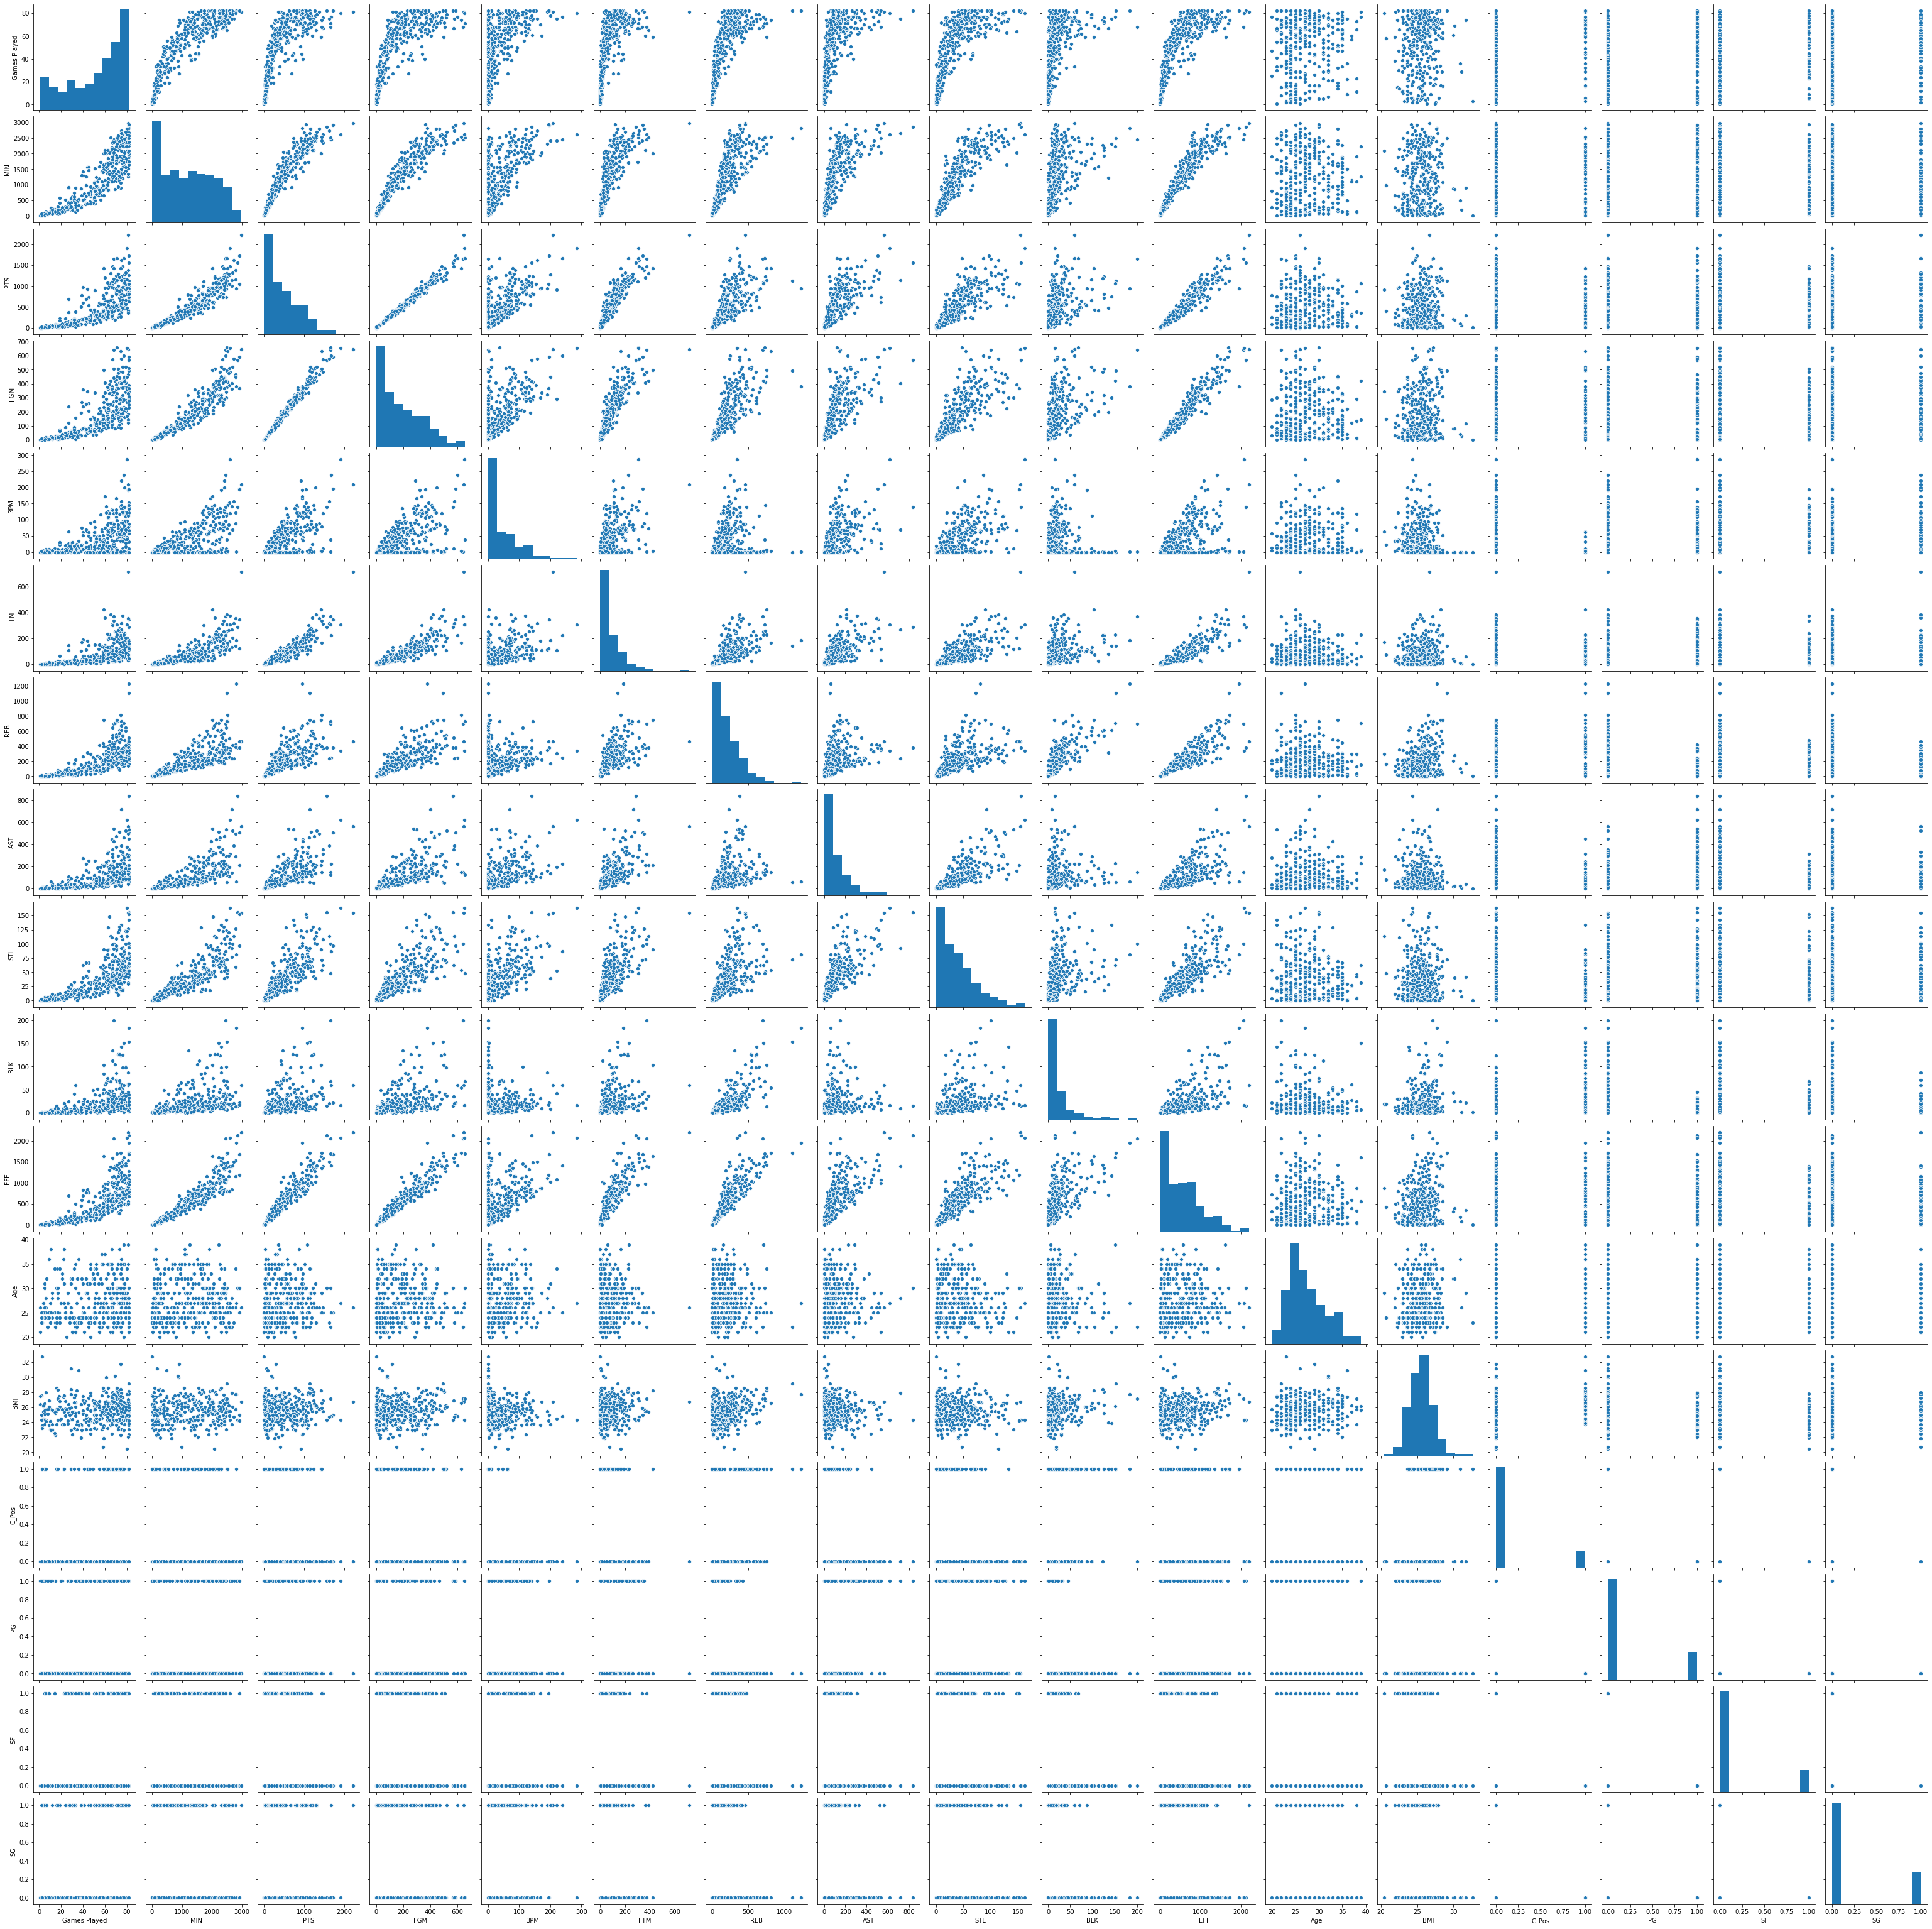

In [10]:
sns.pairplot(final_df)

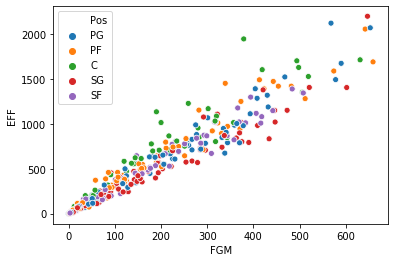

In [36]:
sns.scatterplot(x='FGM', y='EFF',hue='Pos',data=final_df)

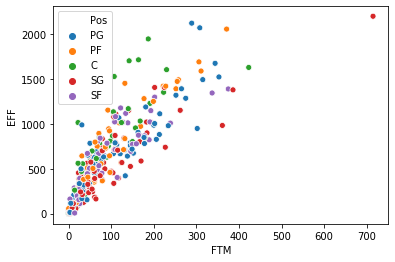

In [37]:
sns.scatterplot(x='FTM', y='EFF',hue='Pos',data=final_df)

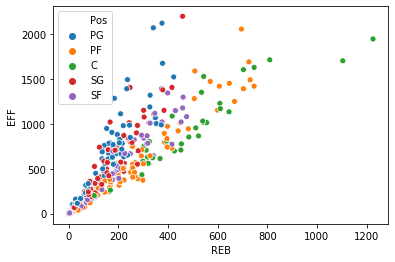

In [38]:
sns.scatterplot(x='REB', y='EFF',hue='Pos',data=final_df)


In [39]:
final_df.groupby(['Pos'])['REB','FTM','FGM','EFF'].agg('mean')

C:\Users\krupa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,REB,FTM,FGM,EFF
Pos,,,,
C,358.877551,84.163265,196.918367,700.551020
PF,257.789474,74.210526,170.921053,542.736842
PG,144.519481,98.753247,201.974026,592.584416
SF,199.921875,80.171875,182.078125,523.046875
SG,138.333333,82.333333,177.940476,463.000000


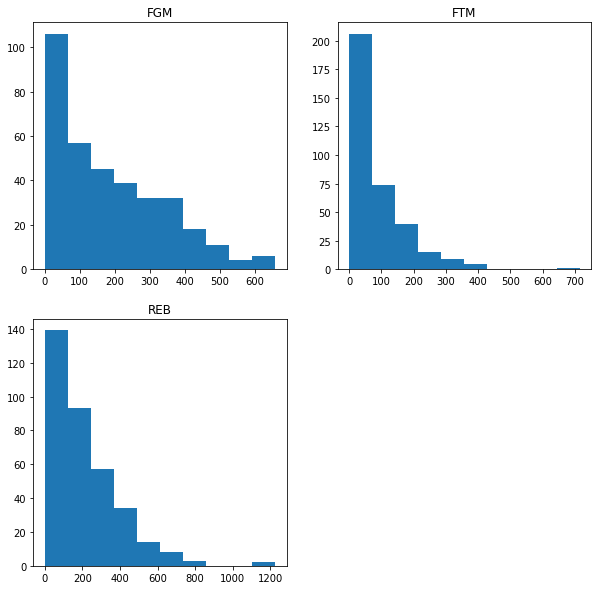

In [40]:
y1=final_df['FGM']
y2=final_df['FTM']
y3=final_df['REB']

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
plt.hist(y1, 10)
plt.title('FGM')

ax2 = fig.add_subplot(222)
plt.hist(y2, 10)
plt.title('FTM')

ax3 = fig.add_subplot(223)
plt.hist(y3, 10)
plt.title('REB')


plt.show()


## OLS without Categorical variables ##

In [41]:
result=ols("EFF ~ FGM+FTM+REB",data=final_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3539.
Date:                Tue, 26 May 2020   Prob (F-statistic):          3.35e-259
Time:                        12:45:10   Log-Likelihood:                -2043.9
No. Observations:                 350   AIC:                             4096.
Df Residuals:                     346   BIC:                             4111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1935      7.114     -0.027      0.9

## OLS with categorical variable ##

In [42]:
result_cat_var=ols("EFF ~ FGM+FTM+REB+C(PG)+C(C_Pos)+C(SF)+C(SG)",data=final_df).fit()
print(result_cat_var.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 26 May 2020   Prob (F-statistic):          5.68e-262
Time:                        12:45:13   Log-Likelihood:                -2021.1
No. Observations:                 350   AIC:                             4058.
Df Residuals:                     342   BIC:                             4089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.1455     11.170     -2.341

In [43]:
pred_val = result.fittedvalues.copy()
true_val = final_df['EFF'].values.copy()
residual = true_val - pred_val

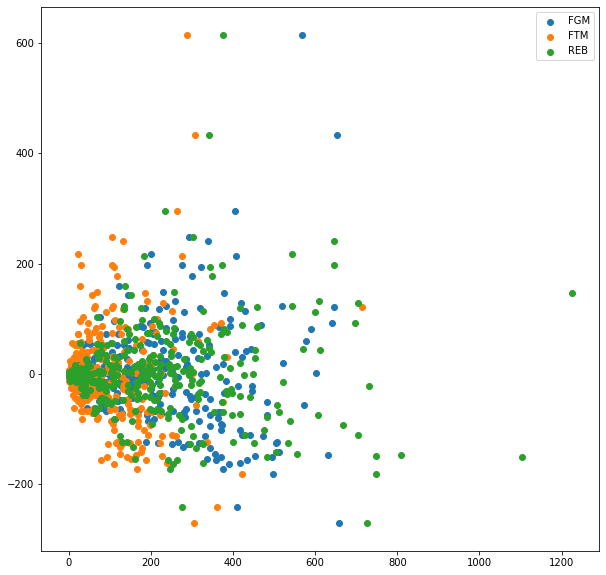

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(final_df['FGM'],residual,label='FGM')
ax.scatter(final_df['FTM'],residual,label='FTM')
ax.scatter(final_df['REB'],residual,label='REB')
ax.legend()

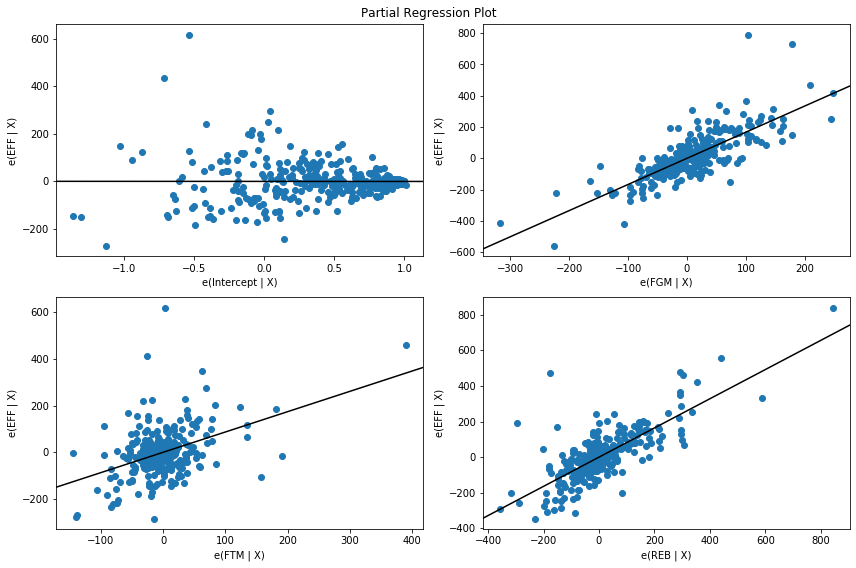

In [45]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [48]:
Y =final_df["EFF"]
X = final_df[["FGM", "FTM","REB"]].values.reshape(-1,3)
result_1 = sklearn.linear_model.LinearRegression().fit(X, Y)
m=result_1.coef_
b=result_1.intercept_

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
train_model = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)

In [50]:
print(train_model.coef_)
print(train_model.intercept_)

[1.72198567 0.72557177 0.84947181]
-5.110541184717022


In [51]:
coeff_df = pd.DataFrame(train_model.coef_,columns=['Coefficient']) 
predict_test = train_model.predict(X_test)
predict_train=train_model.predict(X_train)

In [55]:
test_rmse = (np.sqrt(mean_squared_error(Y_test, predict_test)))
test_r2 = r2_score(Y_test, predict_test)
print(test_rmse) 
print(test_r2) 

90.18000857315795
0.9642324014084067


In [57]:
train_rmse = (np.sqrt(mean_squared_error(Y_train,predict_train)))
train_r2 = r2_score(Y_train, predict_train)ex·plan·a·to·ry
print(train_rmse) 
print(train_r2)

80.50968547759587
0.9695260822308515
